# Explore and prepare the **time-series** dataset
- Time Series  Similarity, Approximation, Motif, Shapelets,  Classification, Clustering
- Pre-process the dataset to be able to run time series clustering; motif/anomaly discovery and classification. If the dataset is too big for these tasks, you can use approximations (e.g. SAX, PAA etc)


 Time-series representing the [spectral centroids](https://librosa.org/doc/latest/generated/librosa.feature.spectral_centroid.html) of the song mp3 audio files.
- 10k time series (500 for each of the 20-genre considered)
- File naming: trackid_genre



In sintesi, il centroide spettrale è una misura che fornisce informazioni sulla distribuzione delle frequenze presenti in un segnale audio e può essere utilizzato per estrarre caratteristiche rilevanti per l'analisi e il trattamento dei segnali audio.


#riporto ad X da df\
X = df.values

#trasformo in df da X\
df = pd.DataFrame(np.squeeze(X))

In [1]:
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from tslearn.preprocessing import TimeSeriesScalerMeanVariance

In [2]:
def load_npy(filename):
    return np.load(filename)

RELOAD , trasformo e approssimo, poi passo a clustering

In [3]:
# reload 
X_y_ids = load_npy(r'C:\Users\HUAWEI\Desktop\DM2\project NEW\output_data\X_y_ids.npz') 
X, y, ids = X_y_ids['arr_0'], X_y_ids['arr_1'], X_y_ids['arr_2']

In [4]:
print(X.shape)
print(y.shape)
print(ids.shape)

## Ready to be used with sktime library ##
# array of 10000  1-dimentional arrays, each of length 1280
#         (10000, 1,                                   1280)

(10000, 1, 1280)
(10000,)
(10000,)


In [5]:
print(y)
print(ids)
print(X)
print()

print(len(y))
print(len(X))
print(len(ids))

['happy' 'emo' 'world-music' ... 'world-music' 'sleep' 'sleep']
['002qpSULhHAw6DGqFxbaO1' '004h8smbIoAkUNDJvVKwkG'
 '006ATYzgynEKIPgVaT5LQM' ... '7zvGj5jjRIBRqT82crTMVf'
 '7zwddyEol0Hg5K8HQd3srX' '7zwWkmiQaVt3AFXUnhBlZk']
[[[4033.9832331  4452.53182549 4493.08463585 ... 3163.79769777
   3135.17003015 3470.55780845]]

 [[1246.7822784  1275.03757568 1389.82545827 ... 2652.79362882
   2693.68073676 2600.65255211]]

 [[ 556.52737148  570.68821915  632.79195186 ...  549.71984951
    575.6562267   565.24270312]]

 ...

 [[2302.0929479  2354.56289982 2498.05046408 ... 2277.9286643
   2288.1843156  2237.39309882]]

 [[ 277.98730102  284.18619178  294.08906347 ...  286.62382674
    276.99432885  260.72051665]]

 [[ 356.0063435   345.85702448  345.96274818 ...  339.33946718
    346.43608034  352.33679407]]]

10000
10000
10000


In [6]:
#per trasformare in dataframe

df = pd.DataFrame(np.squeeze(X))
df["genre"] = y

In [7]:
df

,0,1,2,3,4,5,6,7,8,9,...,1271,1272,1273,1274,1275,1276,1277,1278,1279,genre
0,4033.983233,4452.531825,4493.084636,4205.104114,4124.152380,4374.528603,4218.922430,4811.479415,5380.497768,5408.836533,...,3996.986027,4136.007023,4515.116157,4272.059542,3179.082991,3119.379434,3163.797698,3135.170030,3470.557808,happy
1,1246.782278,1275.037576,1389.825458,1425.923045,1453.146435,1439.394669,1446.677260,1452.278668,1562.862604,1716.595733,...,892.718608,945.693979,2427.495847,4272.999098,4756.297360,3155.547176,2652.793629,2693.680737,2600.652552,emo
2,556.527371,570.688219,632.791952,724.284541,700.265785,637.978949,580.044365,541.837395,538.979271,561.738058,...,703.702623,651.783128,600.108454,568.681377,537.072023,536.968066,549.719850,575.656227,565.242703,world-music
3,2318.553884,2415.404641,2587.678594,2679.752782,2476.585990,2354.537616,2351.667896,2319.100690,2417.571585,2431.619017,...,2486.160195,2369.967771,2435.225332,2516.305110,2457.247966,2398.038946,2382.307384,2390.305834,2520.164300,heavy-metal
4,2197.095845,2299.780004,2340.115366,2230.133271,2162.143986,2060.925716,2085.023936,2122.772450,2095.381438,2073.004571,...,1995.486309,1884.790511,2036.814810,2283.750682,2403.766504,2551.391082,2413.472908,2248.364802,2249.086879,progressive-house
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2714.675059,2273.567285,1794.152523,1461.596435,1486.842231,1576.816447,1656.734425,1676.028261,1779.922921,1737.991497,...,2687.478162,2771.815674,2639.636103,2594.053748,2520.841825,2592.052944,2631.374097,2830.008571,2531.497095,synth-pop
9996,618.054847,620.631310,612.652137,636.176379,635.752477,631.399916,605.110771,626.046116,624.747279,591.403780,...,534.479515,548.647430,551.268466,539.168279,529.838171,567.515093,588.830356,559.373196,558.468585,piano
9997,2302.092948,2354.562900,2498.050464,2485.572104,2368.360732,2397.476901,2450.164601,2463.453644,2638.358828,2428.885493,...,1401.135311,1490.870560,2057.341857,2309.620417,2334.191132,2324.397193,2277.928664,2288.184316,2237.393099,world-music
9998,277.987301,284.186192,294.089063,290.958406,289.316498,298.456330,300.274822,299.111098,301.967315,300.353719,...,287.743691,288.714580,285.405406,281.218507,277.622963,295.527480,286.623827,276.994329,260.720517,sleep


In [8]:
# ho esattamente 500 ts per ogni genere (20 generi)
df['genre'].value_counts()

genre
happy                500
emo                  500
new-age              500
minimal-techno       500
folk                 500
j-idol               500
sleep                500
kids                 500
songwriter           500
sertanejo            500
goth                 500
piano                500
opera                500
synth-pop            500
honky-tonk           500
mpb                  500
progressive-house    500
heavy-metal          500
world-music          500
salsa                500
Name: count, dtype: int64

con resample ogni classe nel dataset contribuirà con un campione casuale di righe, dove ogni riga è stata campionata casualmente e senza sostituzione, fino a raggiungere il numero desiderato di righe campionate per quella classe.

In [9]:
#CAMPIONAMENTO

from sklearn.utils import resample

camp = 0.2 #PROVA 20%

# Definisci il numero totale di righe da campionare
numero_totale_di_righe = 10000

# Calcola il numero di righe da campionare per ogni classe (10% di 500)
righe_per_classe = int(numero_totale_di_righe / len(df["genre"].unique()) * camp)  #PROVA 20%

# Inizializza un DataFrame vuoto per contenere il campione
df_sample = pd.DataFrame()

# Per ogni classe (genere musicale), campiona il 10% delle righe
for genere, dati in df.groupby("genre"):
    campione_classe = resample(dati, n_samples=righe_per_classe, replace=False, random_state=42)
    df_sample = pd.concat([df_sample, campione_classe])

In [10]:
print(df_sample.shape)
df_sample['genre'].value_counts()

(2000, 1281)


genre
emo                  100
folk                 100
synth-pop            100
songwriter           100
sleep                100
sertanejo            100
salsa                100
progressive-house    100
piano                100
opera                100
new-age              100
mpb                  100
minimal-techno       100
kids                 100
j-idol               100
honky-tonk           100
heavy-metal          100
happy                100
goth                 100
world-music          100
Name: count, dtype: int64

In [11]:
# verifico campionamento corretto e label
print(list(df_sample.iloc()[374]) == list(df.iloc()[6130]))
print(list(df_sample.iloc()[200]) == list(df.iloc()[7242]))

True
True


In [12]:
df_sample.iloc()[200]

0        2420.364383
1         2509.79772
2        2524.698243
3         2424.89962
4        2429.093897
            ...     
1276     2250.349402
1277     2286.053697
1278     2308.836485
1279     2157.152737
genre           goth
Name: 7242, Length: 1281, dtype: object

In [13]:
df_sample['genre'].unique()

array(['emo', 'folk', 'goth', 'happy', 'heavy-metal', 'honky-tonk',
       'j-idol', 'kids', 'minimal-techno', 'mpb', 'new-age', 'opera',
       'piano', 'progressive-house', 'salsa', 'sertanejo', 'sleep',
       'songwriter', 'synth-pop', 'world-music'], dtype=object)

In sintesi, il grafico fornisce una rappresentazione visiva delle tendenze nel tempo delle osservazioni medie per ciascuna categoria di genere musicale, consentendo una facile comparazione tra di esse.\

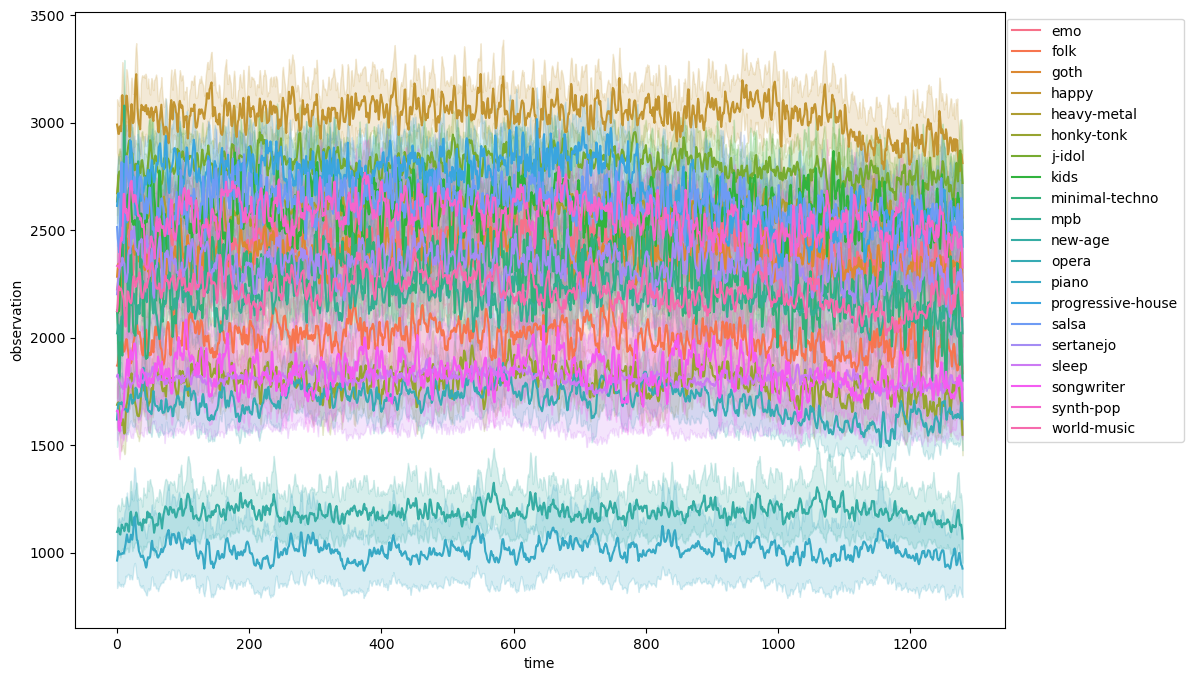

In [25]:
#y = LabelEncoder().fit_transform(y) #[1,10,12,14,15] se voglio numerico

l_gen = ['emo', 'folk', 'goth', 'happy', 'heavy-metal', 'honky-tonk',
       'j-idol', 'kids', 'minimal-techno', 'mpb', 'new-age', 'opera',
       'piano', 'progressive-house', 'salsa', 'sertanejo', 'sleep',
       'songwriter', 'synth-pop', 'world-music']

plt.figure(figsize=(12, 8))  # Imposta larghezza a 10 pollici e altezza a 6 pollici
#filtro solo per alcuni generi
df_filtered = df_sample[df_sample['genre'].isin(l_gen)] 

df_melt = df_filtered.melt(value_name="observation", var_name="time", id_vars="genre")
#cosi posso osservare ts per x generi scelti dalla target

sns.lineplot(df_melt, x="time", y="observation", estimator="mean", hue="genre")

# Posiziona la legenda ancora più a destra
plt.legend(bbox_to_anchor=(1.2, 1), loc='upper right')

# Posiziona la legenda sotto il grafico
# plt.legend(bbox_to_anchor=(0.5, -0.15), loc='upper center', ncol=5)

plt.show()

# proseguo con df campionato

We do approximation to represent a TS into a new smaller and simpler space and use this novel representation for computing, so that the task can be more effectively done on a reduced TS. It's a special form of dimensionality reduction specifically designed for TS. <br>
We first do a moving avg smoothing, per ridurre il rumore e fare un primo smoothing della TS. <br>
Scaliamo poi i dati per fare in modo che abbiano media intorno a 0 e varianza 1 <br>
Poi facciamo le diverse approssimazioni per poter avere delle TS ridotte. 


In [14]:
df = df_sample.reset_index(drop=True).copy()
df

,0,1,2,3,4,5,6,7,8,9,...,1271,1272,1273,1274,1275,1276,1277,1278,1279,genre
0,2513.755195,2921.905277,4170.240481,5204.321998,5672.280964,5673.995238,5521.688262,5174.702757,4938.508307,4489.619578,...,2081.831677,1957.035597,1846.014627,1768.697040,1753.337364,1910.990366,2137.436534,1937.587046,1706.934410,emo
1,569.801856,502.499507,495.989627,717.952354,1115.841264,1241.204255,1422.420202,1448.271044,1308.800182,1218.765235,...,3693.773839,2802.032513,1994.928774,2130.022173,2475.437488,2421.901364,2159.893173,2456.822393,2735.803622,emo
2,2699.328166,2833.750968,2911.430917,2945.916301,2975.969312,2944.045738,2800.844044,2749.080476,2747.861846,2577.411200,...,2390.941396,2609.810139,2889.594434,2661.189828,2606.516831,2420.850610,2121.013471,1902.843474,1994.765258,emo
3,2725.414843,2712.549123,2765.027729,2852.124578,2713.071900,3254.328192,4429.237285,5079.595190,5225.871909,4623.262665,...,3021.560113,2251.244934,1913.667955,1605.592289,1654.982149,2150.530877,2461.740278,2027.264123,1782.873773,emo
4,3875.814130,4059.805770,3924.812017,4124.057610,5060.060570,5896.692559,6095.246504,5873.841812,5264.101564,3788.221322,...,4128.239513,3763.124559,2265.384557,1932.695341,2137.209129,3448.779981,5415.159291,6565.490981,6652.678393,emo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,2190.229782,1897.975002,2051.261309,2400.092409,2351.171903,2264.112958,2537.800174,3112.409383,3688.235037,4718.953725,...,2368.992179,2319.211527,2542.591018,2890.257927,2992.531936,2718.208491,2401.621618,2451.760854,2484.214708,world-music
1996,2001.792785,2047.697120,2144.820759,2153.342950,1991.131759,1767.677172,1660.097750,1560.807108,1657.365614,1756.441728,...,2309.502996,2400.431774,2274.854416,2059.042925,1926.499268,1873.397166,1825.899076,1993.122130,2339.556888,world-music
1997,839.990857,840.291309,862.366053,911.292925,937.202702,942.480815,983.018384,1050.858032,968.490545,813.097299,...,684.169411,585.604214,534.790372,547.903897,522.274043,513.513180,556.026989,530.592319,459.417365,world-music
1998,2349.456083,2489.752062,2501.520566,2406.892173,2294.956695,2210.174075,2223.941114,2376.537424,2155.095772,1898.565999,...,1609.231792,1714.722528,1757.283006,1741.314902,1740.753277,1715.421140,1671.320250,1542.932215,1377.331532,world-music


In [15]:
# Assegna la variabile target
y = df.iloc[:, -1].values

# Assegna il resto dei valori a X escludendo l'ultima colonna
X = df.iloc[:, :-1].values
X.shape, y.shape

((2000, 1280), (2000,))

In [16]:
#1

#y = LabelEncoder().fit_transform(y)
#np.savez(r'C:\Users\HUAWEI\Desktop\DM2\project NEW\output_data\y', y, allow_pickle=True)

#2
# Salva l'array di stringhe in un file di testo
np.savetxt(r'C:\Users\HUAWEI\Desktop\DM2\project NEW\output_data\y.txt', y, fmt='%s')

## prove di plot ts

In [17]:
#seleziono priama riga del mio dataframe escludendo la target categorica y
ts1_df = df.iloc[0, :-1]
ts1_df

0       2513.755195
1       2921.905277
2       4170.240481
3       5204.321998
4       5672.280964
           ...     
1275    1753.337364
1276    1910.990366
1277    2137.436534
1278    1937.587046
1279     1706.93441
Name: 0, Length: 1280, dtype: object

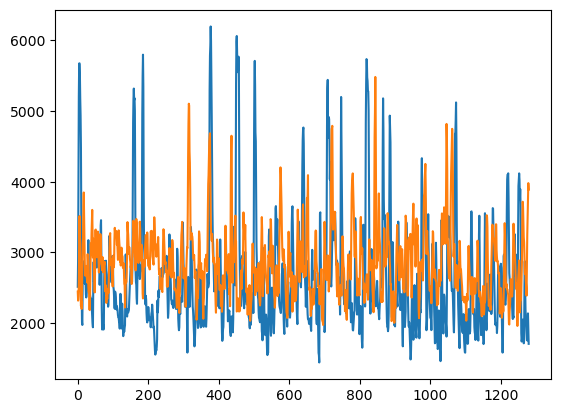

In [18]:
#codici creazione ts di prova da df

ts1_df = df.iloc[0, :-1]
ts2_df = df.iloc[999, :-1]

ts1_df.plot()
ts2_df.plot()
plt.show()

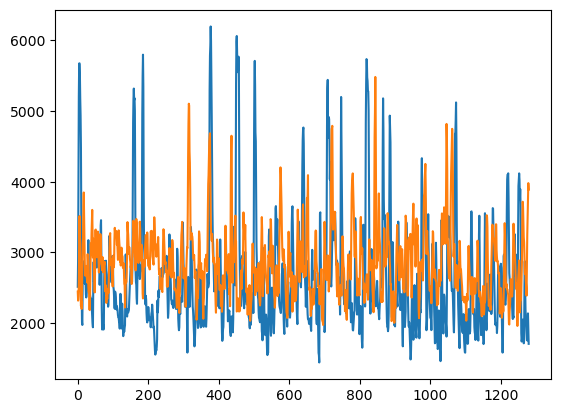

In [19]:
#codici creazione ts di prova direttamente da X
ts1 = X[0].T
ts2 = X[999].T

plt.plot(ts1)
plt.plot(ts2)
plt.show()

RICORDA

Un array multidimensionale può avere più di due dimensioni. Ad esempio, un array tridimensionale potrebbe essere visualizzato come una pila di matrici. In un array tridimensionale, ogni elemento è accessibile specificando tre indici: uno per ciascuna delle tre dimensioni.
~~~
# Dichiarazione di un array tridimensionale 2x3x4  OVVERO 2 STRATI, OGNUNO CON 3 RIGHE E 4 COLONNE
array_tridimensionale = [[[1, 2, 3, 4],
                          [5, 6, 7, 8],
                          [9, 10, 11, 12]],
                         [[13, 14, 15, 16],
                          [17, 18, 19, 20],
                          [21, 22, 23, 24]]]

# Accesso a un elemento specifico (es. strato 1, riga 2, colonna 3)
elemento = array_tridimensionale[0][1][2]
print(elemento)  # Output: 7
~~~


La forma `(10000, 1, 1280)` indica che il tuo array multidimensionale ha tre dimensioni:

1. La prima dimensione ha una lunghezza di 10000.
2. La seconda dimensione ha una lunghezza di 1.
3. La terza dimensione ha una lunghezza di 1280.

Quindi, potresti immaginare il tuo array come una raccolta di 10000 matrici, ognuna delle quali ha una singola riga e 1280 colonne. Questo tipo di forma è comune in contesti come l'elaborazione di immagini o dati di tipo sequenza, dove ogni "oggetto" ha una forma composta da più elementi organizzati in più dimensioni.

In [20]:
#cosi faccio accesso alla prima matrice, che ha 1 riga e 1280 colonne
X[0].shape

(1280,)

In [21]:
#ok cosi itero le righe

count =0
for ts in X:
    print(ts)
    count +=1
    if count == 10:
        break

[2513.75519485 2921.90527682 4170.24048064 ... 2137.43653392 1937.58704649
 1706.93441046]
[ 569.80185553  502.49950672  495.98962709 ... 2159.89317259 2456.8223934
 2735.80362191]
[2699.32816629 2833.75096756 2911.43091673 ... 2121.01347111 1902.8434739
 1994.76525825]
[2725.41484276 2712.54912277 2765.02772945 ... 2461.7402776  2027.26412289
 1782.87377267]
[3875.81412984 4059.80576966 3924.81201715 ... 5415.15929131 6565.49098072
 6652.6783934 ]
[1866.5078487  2021.10981275 2060.4396848  ... 2096.39284004 1937.37800482
 1860.24145202]
[2506.2966624  2393.32047493 2337.55090139 ... 3743.59852841 3838.10988974
 3011.26821686]
[2817.49103716 2614.86193968 2433.50087239 ... 2975.43988027 2835.40711681
 2587.99320349]
[2612.76454331 2646.75649351 2639.03159337 ... 2728.06932673 2707.14540274
 2606.07634426]
[2946.06452539 2930.17113318 3025.7904372  ... 2541.83475257 2621.51666929
 2409.84464445]


# transformations



In [22]:
X

array([[2513.75519485, 2921.90527682, 4170.24048064, ..., 2137.43653392,
        1937.58704649, 1706.93441046],
       [ 569.80185553,  502.49950672,  495.98962709, ..., 2159.89317259,
        2456.8223934 , 2735.80362191],
       [2699.32816629, 2833.75096756, 2911.43091673, ..., 2121.01347111,
        1902.8434739 , 1994.76525825],
       ...,
       [ 839.99085739,  840.29130873,  862.36605294, ...,  556.02698899,
         530.59231911,  459.41736488],
       [2349.45608312, 2489.75206167, 2501.52056604, ..., 1671.3202496 ,
        1542.9322147 , 1377.33153231],
       [2394.65946932, 2601.76326228, 2917.31903977, ..., 2971.24557167,
        3034.63084731, 3029.60514354]])

In [23]:
X_scal = X.copy()
X_scal

array([[2513.75519485, 2921.90527682, 4170.24048064, ..., 2137.43653392,
        1937.58704649, 1706.93441046],
       [ 569.80185553,  502.49950672,  495.98962709, ..., 2159.89317259,
        2456.8223934 , 2735.80362191],
       [2699.32816629, 2833.75096756, 2911.43091673, ..., 2121.01347111,
        1902.8434739 , 1994.76525825],
       ...,
       [ 839.99085739,  840.29130873,  862.36605294, ...,  556.02698899,
         530.59231911,  459.41736488],
       [2349.45608312, 2489.75206167, 2501.52056604, ..., 1671.3202496 ,
        1542.9322147 , 1377.33153231],
       [2394.65946932, 2601.76326228, 2917.31903977, ..., 2971.24557167,
        3034.63084731, 3029.60514354]])

## Transformation III: Noise (smoothing)



In [24]:
def moving_average_smoothing(series, window_size):
    """
    Perform moving average smoothing on a single time series.
    
    series: Input time series as a 1-dimensional numpy array.
    window_size: Size of the moving window as an integer.
    
    Returns the smoothed time series.
    """
    window = np.ones(window_size) / window_size
    smoothed_series = np.convolve(series, window, mode='same')
    return smoothed_series

Per scegliere il valore ottimale di w, potresti eseguire alcuni esperimenti utilizzando diverse dimensioni della finestra e valutare l'impatto sui tuoi dati. Ad esempio, potresti provare a testare w con valori come 5, 10, 20, 50 e osservare come influenzano l'aspetto e il comportamento delle tue serie temporali.

Inoltre, è importante considerare il trade-off tra smussatura e conservazione dei dettagli. Se la smussatura è importante per il tuo caso d'uso, potresti optare per un valore di w più grande. Se invece è cruciale mantenere i dettagli, potresti preferire un valore di w più piccolo.

In [25]:
#tss_scal_smot = tss_scal.copy()

w = 10 #che valore di w usare?

for i,time_series in enumerate(X_scal):
    X_scal[i]= moving_average_smoothing(X_scal[i], w)


In [26]:
X_scal

array([[2048.25039145, 2615.64991529, 3167.81874151, ..., 1501.80329862,
        1306.09973888, 1121.49827614],
       [ 340.20846074,  464.32888627,  606.5709065 , ..., 1917.68414995,
        1637.48089861, 1437.98802125],
       [1436.63956638, 1731.04414019, 2011.12854459, ..., 1920.65840447,
        1659.67739054, 1370.71794714],
       ...,
       [ 439.11438461,  533.36246607,  631.66430444, ...,  425.01223785,
         366.45181646,  312.97277924],
       [1204.25775785, 1425.27516535, 1647.66927672, ..., 1326.10788493,
        1154.63563215,  978.90733154],
       [1418.06147663, 1725.30113527, 2028.38265733, ..., 2188.25922245,
        1974.03203594, 1768.20491518]])

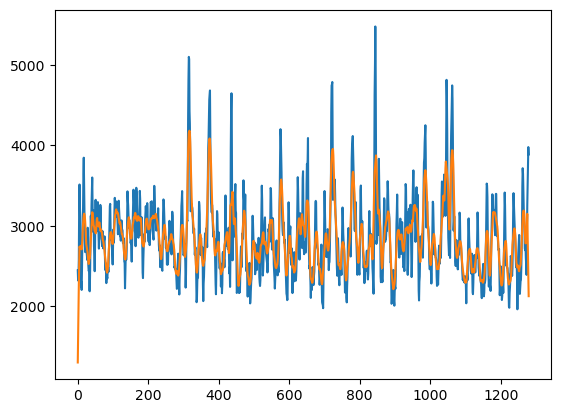

In [27]:
#confronto ts tra x e x_scal

# ts1 = tss_scal_smot.iloc[0]
# ts2 = tss_scal_smot.iloc[3000]

ts1 = X[999]
ts2 = X_scal[999]

plt.plot(ts1)
plt.plot(ts2)
plt.show()

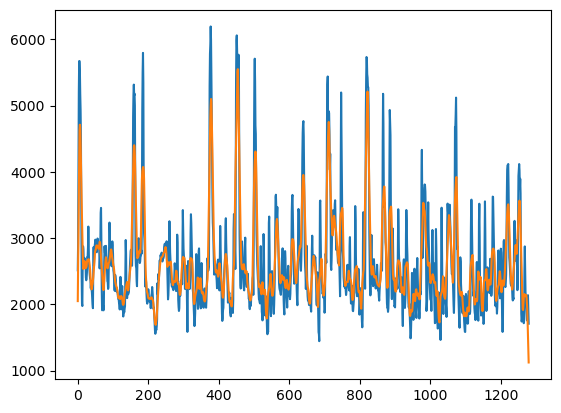

In [28]:
#confronto ts tra x e x_scal

# ts1 = tss_scal_smot.iloc[0]
# ts2 = tss_scal_smot.iloc[3000]

ts1 = X[0]
ts2 = X_scal[0]

plt.plot(ts1)
plt.plot(ts2)
plt.show()

In [29]:
from sktime.datasets import load_airline
from sktime.transformations.series.adapt import TabularToSeriesAdaptor
from sklearn.preprocessing import StandardScaler
from sktime.transformations.series.detrend import Detrender
from sktime.transformations.series.detrend import Deseasonalizer
from sktime.pipeline import make_pipeline

la prima trasformazione standardizzerà i dati in modo che abbiano una deviazione standard di uno, mentre la seconda trasformazione li centrerà sulla media senza modificare la deviazione standard. La scelta tra queste due tecniche dipenderà dalle esigenze specifiche del tuo problema e dalle caratteristiche dei dati che stai affrontando.\
scaler = TabularToSeriesAdaptor(StandardScaler())\
scaler = TabularToSeriesAdaptor(StandardScaler(with_std=False))

#### Transformation II: Amplitude Scaling

In [49]:
# X_scal=TimeSeriesScalerMeanVariance().fit_transform(X_scal)
# X_scal

array([[[-9.23229761e-01],
        [-2.10205659e-03],
        [ 8.94299830e-01],
        ...,
        [-1.81034287e+00],
        [-2.12805193e+00],
        [-2.42773763e+00]],

       [[-3.10830577e+00],
        [-2.92985742e+00],
        [-2.72535559e+00],
        ...,
        [-8.40363708e-01],
        [-1.24321286e+00],
        [-1.53002443e+00]],

       [[-2.95759677e+00],
        [-2.32718301e+00],
        [-1.72743328e+00],
        ...,
        [-1.92115860e+00],
        [-2.48000190e+00],
        [-3.09875591e+00]],

       ...,

       [[-1.10093097e+00],
        [-7.05159597e-01],
        [-2.92365476e-01],
        ...,
        [-1.16014943e+00],
        [-1.40605936e+00],
        [-1.63063127e+00]],

       [[-4.20710985e+00],
        [-3.25884909e+00],
        [-2.30468167e+00],
        ...,
        [-3.68431983e+00],
        [-4.42001034e+00],
        [-5.17396114e+00]],

       [[-4.61338169e+00],
        [-3.50955321e+00],
        [-2.42066379e+00],
        ...,
        

In [30]:
print(X_scal.shape)

(2000, 1280)


In [202]:

X_scal = np.squeeze(X_scal)
print(X_scal.shape)

(2000, 1280)
(2000, 1280)


In [203]:
# scaler = TabularToSeriesAdaptor(StandardScaler())

# X_scal = scaler.fit_transform(X_scal)
# X_scal

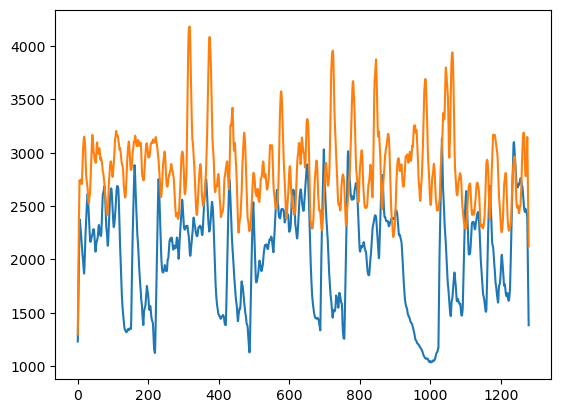

In [31]:
#stesso x_scal

# ts1 = tss_scal.iloc[0]
# ts2 = tss_scal.iloc[3000]

ts1 = X_scal[200].T
ts2 = X_scal[999].T
plt.plot(ts1)
plt.plot(ts2)
plt.show()

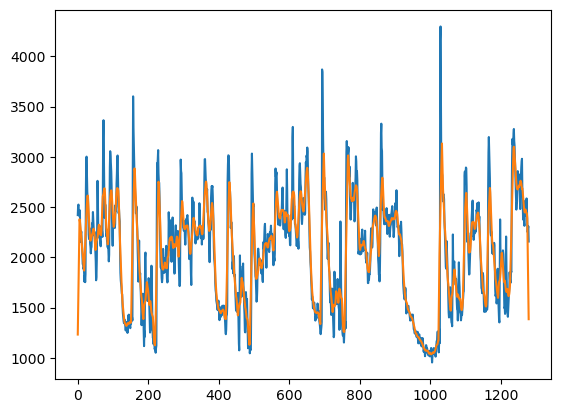

In [28]:
#confronto ts tra x e x_scal

# ts1 = tss_scal_smot.iloc[0]
# ts2 = tss_scal_smot.iloc[3000]

ts1 = X[200].T
ts2 = X_scal[200].T

plt.plot(ts1)
plt.plot(ts2)
plt.show()

RECAP TRASFORMAZIONI

avendo fatto tutte le prove adesso scelgo la forma definitiva per il mio df e proseguo con le approssimazioni da salvare.
- trasformazione
- salvo due dataset approssimati
- poi eseguo clustering con valutazione silohuette e ssse su dati grezzi e approssimati

salvo

In [32]:
#riporto a df
df_scal = pd.DataFrame(np.squeeze(X_scal))
df_scal['genre'] = y

df_scal

,0,1,2,3,4,5,6,7,8,9,...,1271,1272,1273,1274,1275,1276,1277,1278,1279,genre
0,2048.250391,2615.649915,3167.818742,3685.289017,4179.139848,4628.101806,4711.869112,4666.806808,4450.824774,4127.795815,...,2125.688333,2141.776435,2104.260401,2010.620242,1929.032233,1709.986466,1501.803299,1306.099739,1121.498276,emo
1,340.208461,464.328886,606.570907,751.398011,882.278029,1004.154553,1065.848355,1253.976869,1645.740988,2097.193473,...,2804.967028,2857.225151,2888.967902,2812.020937,2678.440074,2287.061534,1917.684150,1637.480899,1437.988021,emo
2,1436.639566,1731.044140,2011.128545,2286.036592,2560.822777,2818.563897,2796.087880,2761.414072,2720.862081,2684.418536,...,3116.989729,2884.532738,2648.334001,2487.827475,2411.679157,2159.752544,1920.658404,1659.677391,1370.717947,emo
3,1376.818817,1702.251636,2145.175365,2653.134884,3175.722075,3638.048341,3610.511561,3505.046991,3526.607703,3561.911424,...,2291.620369,2277.329030,2328.064693,2315.333448,2238.131673,1886.945649,1584.789638,1359.665144,1168.298349,emo
4,2104.455010,2694.124266,3303.648916,3891.033097,4417.443254,4796.265386,4684.720934,4559.835677,4452.473136,4327.516222,...,3159.698117,3305.321356,3518.826969,3797.149035,4053.498684,3630.876175,3218.052223,2841.739767,2615.201312,emo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1089.073040,1315.484336,1569.264354,1880.505292,2249.328796,2721.224168,3046.964411,3427.112918,3739.130490,3841.664517,...,2947.908196,2760.040188,2600.223948,2543.469669,2549.879669,2316.939026,2080.039808,1848.118655,1593.859553,world-music
1996,1033.878537,1210.646255,1376.656030,1532.736740,1698.473302,1874.117474,1855.533475,1813.560497,1766.510973,1741.148080,...,2266.920383,2211.283515,2165.419448,2139.512838,2136.856862,1900.230664,1669.280364,1429.237187,1201.751745,world-music
1997,439.114385,533.362466,631.664304,736.750108,833.599162,914.908892,911.505559,902.908824,880.763128,852.573052,...,827.790977,750.465128,699.156575,647.827991,586.022333,493.429179,425.012238,366.451816,312.972779,world-music
1998,1204.257758,1425.275165,1647.669277,1885.323019,2100.832596,2290.689196,2246.881957,2210.109678,2190.976064,2173.174363,...,1690.270438,1698.210915,1696.656197,1682.904917,1650.347089,1487.031064,1326.107885,1154.635632,978.907332,world-music


In [33]:
df_scal.to_csv(r'C:\Users\HUAWEI\Desktop\DM2\project NEW\output_data\df_scal.csv', index=False)  # index=False per evitare di salvare l'indice

In [34]:
#np.savez(r'C:\Users\HUAWEI\Desktop\DM2\project NEW\output_data\X_scal_y', X_scal, y)
np.save(r'C:\Users\HUAWEI\Desktop\DM2\project NEW\output_data\X_scal', X_scal)


# Approximation

scegli due tipi di approx e salva i file, visualizzo i plot ts originale e approx
- sax
- paa
- dft


libreria tslearn o pyts


1- PAA


In generale, con 1280 timestamp, un window_size di 2 potrebbe essere troppo piccolo per ottenere una buona approssimazione. Potresti voler considerare window_size più grande, ad esempio 128, 64 o anche 32, a seconda delle caratteristiche della tua serie temporale e del grado di dettaglio che desideri mantenere nell'approssimazione.


Le serie temporali con un'elevata frequenza di campionamento possono essere molto rumorose. Per ridurre il rumore è stata inventata una tecnica chiamata Approssimazione aggregata a pezzi , che consiste nel prendere la media su punti consecutivi. Ciò diminuisce il numero di punti e riduce il rumore preservando l'andamento della serie temporale. Questo esempio illustra la trasformazione. È implementato come pyts.approximation.PiecewiseAggregateApproximation.

In [35]:
X_scal.shape

(2000, 1280)

In [36]:
from pyts.approximation import PiecewiseAggregateApproximation

window_size = 4

paa = PiecewiseAggregateApproximation(window_size=window_size)
X_paa = paa.transform(X_scal)
X_scal.shape, X_paa.shape

((2000, 1280), (2000, 320))

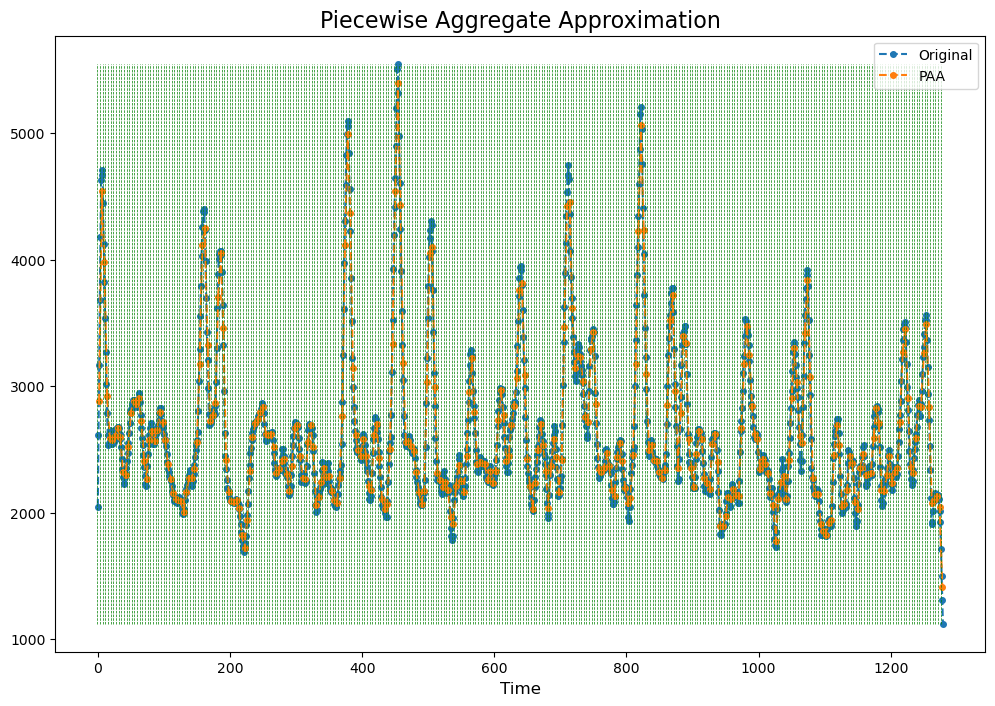

In [37]:
n_timestamps =  1280

# Show the results for the first time series  
plt.figure(figsize=(12, 8))
plt.plot(X_scal[0], 'o--', ms=4, label='Original')
plt.plot(np.arange(window_size // 2,
                   n_timestamps + window_size // 2,
                   window_size), X_paa[0], 'o--', ms=4, label='PAA')
plt.vlines(np.arange(0, n_timestamps, window_size) - 0.5,
           X_scal[0].min(), X_scal[0].max(), color='g', linestyles='--', linewidth=0.5)
plt.legend(loc='best', fontsize=10)
plt.xlabel('Time', fontsize=12)
plt.title('Piecewise Aggregate Approximation', fontsize=16)
plt.show()

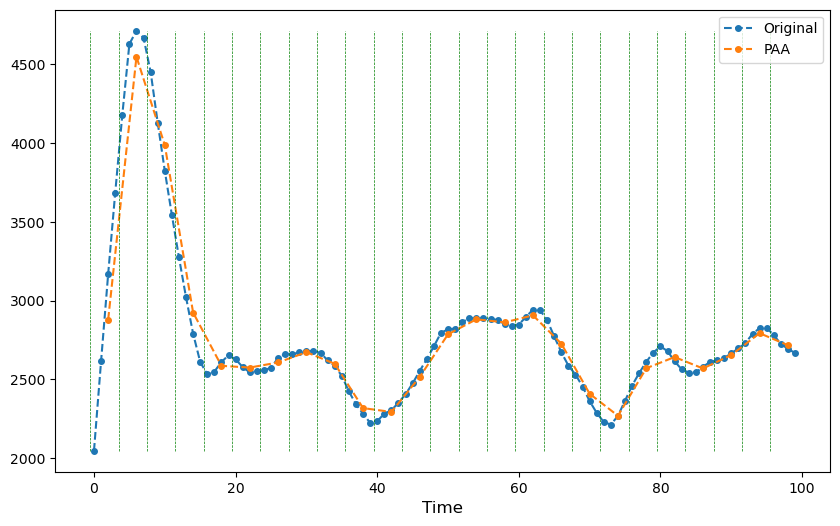

In [38]:
# Definire la lunghezza ridotta desiderata
lunghezza_ridotta = 100

# Visualizza solo i primi 500 timestamp della prima serie temporale
plt.figure(figsize=(10, 6))
plt.plot(X_scal[0][:lunghezza_ridotta], 'o--', ms=4, label='Original')
plt.plot(np.arange(window_size // 2,
                   lunghezza_ridotta + window_size // 2,
                   window_size), X_paa[0][:lunghezza_ridotta//window_size], 'o--', ms=4, label='PAA')
plt.vlines(np.arange(0, lunghezza_ridotta, window_size) - 0.5,
           X_scal[0][:lunghezza_ridotta].min(), X_scal[0][:lunghezza_ridotta].max(), color='g', linestyles='--', linewidth=0.5)
plt.legend(loc='best', fontsize=10)
plt.xlabel('Time', fontsize=12)
#plt.title('Piecewise Aggregate Approximation (Shortened)', fontsize=16)
plt.show()


ok quindi lasciando window size di 4 comunque mantengo un buon livello di dettaglio e approssimo poco. ma va bene cosi e metto figura.

In [39]:
# now each 1-dimentional array has 100 observations
## these np array can also be saved if needed 
#--------------------------------------------------
# these (or any other) numpy arrays can be also saved as npy files (for subsequent reloading)
np.save(r'C:\Users\HUAWEI\Desktop\DM2\project NEW\output_data\X_paa', X_paa)

# reload
# X_y_ids = load_npy('X_y_ids.npz') 
# X, y, ids = X_y_ids['arr_0'], X_y_ids['arr_1'], X_y_ids['arr_2']

In [40]:
#riporto a df
df_paa = pd.DataFrame(np.squeeze(X_paa))
df_paa['genre'] = y
df_paa.to_csv(r'C:\Users\HUAWEI\Desktop\DM2\project NEW\output_data\df_paa.csv', index=False)

<h4>Approximation</h4>
Facciamo tre versioni: SAX, PAA e DFT

In [41]:
from tslearn.piecewise import SymbolicAggregateApproximation
from tslearn.piecewise import OneD_SymbolicAggregateApproximation

In [42]:
## SAX with 50 symbols and 500 segments - erano quelli che plottando la TS davano risultato migliore

n_sax_symbols = 10
sax = SymbolicAggregateApproximation(n_segments=500, 
                                     alphabet_size_avg=n_sax_symbols, scale=True)
X_sax = sax.fit_transform(X_scal)
#sax_dataset_inv = sax.inverse_transform(X_train_sax)

c:\Users\HUAWEI\anaconda3\Lib\site-packages\tslearn\utils\utils.py:90: UserWarning: 2-Dimensional data passed. Assuming these are 2000 1-dimensional timeseries
  warnings.warn(


In [43]:
X_sax.shape

(2000, 500, 1)

In [47]:
X_sax = X_sax.squeeze()
X_sax.shape


(2000, 500)

In [50]:
np.unique(X_sax[1], return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([ 3, 27, 34, 60, 56, 64, 74, 71, 56, 55], dtype=int64))

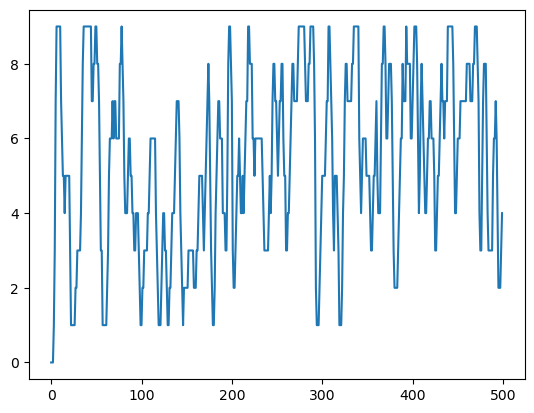

In [49]:
plt.plot(X_sax[1])

In [51]:
np.save(r'C:\Users\HUAWEI\Desktop\DM2\project NEW\output_data\X_sax', X_sax)

In [52]:
#riporto a df
df_sax = pd.DataFrame(np.squeeze(X_sax))
df_sax['genre'] = y
df_sax.to_csv(r'C:\Users\HUAWEI\Desktop\DM2\project NEW\output_data\df_sax.csv', index=False)

In [53]:
df_sax

,0,1,2,3,4,5,6,7,8,9,...,491,492,493,494,495,496,497,498,499,genre
0,5,9,9,9,9,9,8,7,6,6,...,9,9,8,7,7,6,6,6,6,emo
1,0,0,0,1,3,7,9,9,9,9,...,6,7,6,4,2,2,2,3,4,emo
2,2,4,7,7,7,6,6,7,7,7,...,6,6,6,6,7,7,7,7,7,emo
3,2,5,9,9,9,9,9,9,8,8,...,4,4,5,8,9,9,9,9,7,emo
4,5,9,9,9,9,9,9,9,9,9,...,4,4,5,5,5,5,4,3,4,emo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1,2,6,8,9,9,9,9,6,3,...,6,7,8,8,8,7,7,7,8,world-music
1996,1,1,3,3,3,2,2,2,2,2,...,3,2,2,2,2,2,2,2,3,world-music
1997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,world-music
1998,1,3,4,5,4,4,4,5,5,5,...,4,4,4,4,4,4,4,4,5,world-music


3- DFT


In [54]:
## DFT
from pyts.approximation import DiscreteFourierTransform

In [55]:
n_coefs = 64

dft = DiscreteFourierTransform(n_coefs=n_coefs)
X_dft = dft.fit_transform(X_scal)
X_dft.shape

(2000, 64)

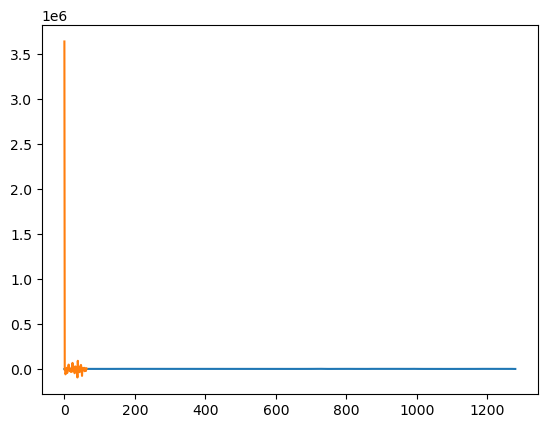

In [56]:
n= 999
plt.plot(X_scal[n])
plt.plot(X_dft[n])
plt.show()

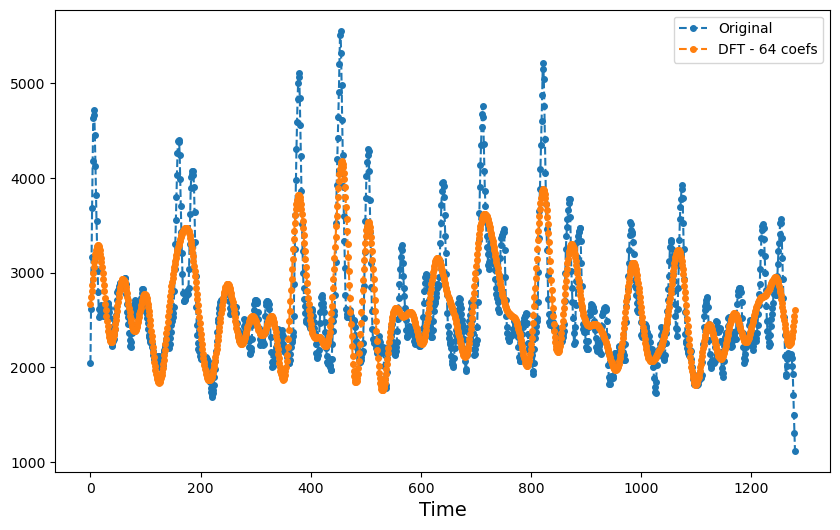

In [57]:
# Parameters
n_timestamps = 1280
n_samples = 2000

# Compute the inverse transformation
if n_coefs % 2 == 0:
    real_idx = np.arange(1, n_coefs, 2)
    imag_idx = np.arange(2, n_coefs, 2)
    X_dft_new = np.c_[
        X_dft[:, :1],
        X_dft[:, real_idx] + 1j * np.c_[X_dft[:, imag_idx],
                                        np.zeros((n_samples, ))]
    ]
else:
    real_idx = np.arange(1, n_coefs, 2)
    imag_idx = np.arange(2, n_coefs + 1, 2)
    X_dft_new = np.c_[
        X_dft[:, :1],
        X_dft[:, real_idx] + 1j * X_dft[:, imag_idx]
    ]
X_irfft = np.fft.irfft(X_dft_new, n_timestamps)

# Show the results for the first time series
plt.figure(figsize=(10, 6))
plt.plot(X_scal[0], 'o--', ms=4, label='Original')
plt.plot(X_irfft[0], 'o--', ms=4, label='DFT - {0} coefs'.format(n_coefs))
plt.legend(loc='best', fontsize=10)
plt.xlabel('Time', fontsize=14)
#plt.title('Discrete Fourier Transform', fontsize=16)
plt.show()

In [58]:
np.save(r'C:\Users\HUAWEI\Desktop\DM2\project NEW\output_data\X_dft', X_dft)

In [59]:
#riporto a df
df_dft = pd.DataFrame(np.squeeze(X_dft))
df_dft['genre'] = y
df_dft.to_csv(r'C:\Users\HUAWEI\Desktop\DM2\project NEW\output_data\df_dft.csv', index=False)
df_dft

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,genre
0,3.349689e+06,-64108.514348,-19623.121059,38051.153573,-47124.688824,70889.638702,11839.145174,-29622.331974,-48935.419364,7075.782304,...,33345.244346,-59476.629286,-83736.337828,-56285.205430,-6702.735389,11288.821859,47842.982511,-56028.455189,-64044.827214,emo
1,3.202819e+06,-54314.635541,162954.403288,67791.511282,62295.093680,24056.077433,-44214.488580,-99411.317141,16160.390626,-120242.771529,...,-12356.248012,-26017.811584,57351.109839,8125.362141,-69004.497995,17766.315028,-16538.985812,5455.651594,-61385.509390,emo
2,3.606840e+06,-113341.495890,40664.539398,-104034.454451,-70389.399895,21073.854362,-29118.754783,-40218.397224,-77779.706902,53460.712255,...,5949.684602,21838.797561,-26518.181176,10869.994550,37275.062297,-3154.788138,10475.153989,20609.558175,-51596.518498,emo
3,2.974460e+06,96238.488525,-11493.506630,-76815.941942,66697.151209,113990.150710,2764.056279,-43166.970873,-9371.998240,40138.888139,...,53661.761155,13201.365938,-39163.354186,24153.958503,-10039.991874,27379.408571,-13030.798799,6571.353367,27178.852657,emo
4,3.578529e+06,-126616.744859,-48193.776409,-21592.370311,34672.695250,104898.594268,65531.960814,136795.469955,89211.709388,66150.788476,...,74615.060743,-6883.531656,22247.614245,-142589.876774,-81412.001987,-27281.694554,-45030.101688,-120910.748431,-73965.977947,emo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,2.771141e+06,-140405.962338,77275.865578,35453.960335,-50514.319714,365814.169191,-26248.756453,259706.536044,-149926.930911,50900.925781,...,5367.046667,22183.410388,-4588.986927,89035.854521,-60141.084942,-72136.036354,-18780.144396,-65340.982875,-5776.178643,world-music
1996,2.449763e+06,67886.497346,43324.988000,-7915.954380,7729.550172,-31920.780894,-5599.592290,-61010.022570,255.995920,25935.177888,...,-7347.504012,11221.058985,779.162674,6042.546506,-25842.983816,23181.084486,12900.653551,12079.005568,57900.011891,world-music
1997,8.976481e+05,4073.021008,7762.670271,6270.111991,-3879.828380,-1674.566082,-3532.907420,-6091.972598,-313.007984,-5602.181421,...,-5302.682945,1719.304232,-5633.057629,360.451242,-3364.018273,968.288638,-1735.813000,1289.070716,-3962.791184,world-music
1998,2.796591e+06,-19217.465301,-44473.513335,24322.108742,16309.943855,44020.118674,-13619.404427,30038.046824,-61638.940197,-22399.610424,...,13670.649513,-4772.423971,2854.419115,3050.469804,15385.809418,-1585.882220,-3846.632963,-2147.823452,10099.900874,world-music


## COME FARE SPLIT E LABELENCODER

In [37]:
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [40]:
y = LabelEncoder().fit_transform(y)
y

<built-in method max of numpy.ndarray object at 0x0000021729FCDFB0>


In [41]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8000, 1, 1280), (2000, 1, 1280), (8000,), (2000,))

In [42]:
df = pd.DataFrame(np.squeeze(X_train))
df["genre"] = y_train

L'operazione melt in pandas è un metodo per trasformare un DataFrame da un formato "wide" (largo) a un formato "long" (lungo). Questo è utile quando si desidera ristrutturare i dati in modo che siano più facilmente analizzabili o utilizzabili in determinati contesti.

cosi avrò un formato "lungo" anziche "largo" e più facilmente visualizzabile in plot. tutte le osservazioni temporali (colonne) adesso sono in unica colonna

In [44]:
#filtro solo per alcuni generi
df_filtered = df[df['genre'].isin([1,10,12,14,15])] 

df_melt = df_filtered.melt(value_name="observation", var_name="time", id_vars="genre")

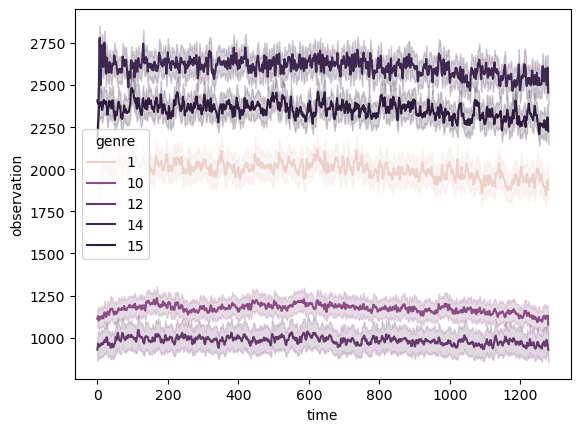

In [45]:
#cosi posso osservare ts per i 5 generi scelti dalla target

sns.lineplot(df_melt, x="time", y="observation", estimator="mean", hue="genre")
plt.show()